<center> <h1>  Transfer Learning Image Classification - CNNs </h1> </center>

## Exercises Part 1.  
#### 1. What are the advantages of a CNN over a fully connected DNN for image classification?     
  - CNNs work better for larger images, because of the huge number of parameters. They diminish the transmitted information from layer to layer by using partially connected layers.  
  -  translational invariance - once a CNN has learned to recognize a pattern in one location (in an image, etc. ), it will recognize it in any other location (in an image as classification candidate for instance). A DNN will recognize a pattern only in the location, where it was, when learning.
  - in CNNs the lower layers identify features in small areas and higher levels use that information to build larger features. DNNs have no presumption that feature pixels are close. Hence CNNs have kind of apriori knowledge about the organization of pixels and this is an advantage for the algorithmic model when learning to classify images. 


####  2. Consider a CNN composed of three convolutional layers... What is the total number of parameters in the CNN?  
  
  - N params. 1st Conv. Layer = (Heigh_kernel x Widht_kernel x N_channels + bias) x N_feature_maps = (3x3x3+1)x100 = 2800  
  - N params. 2nd Conv. Layer = (Heigh_kernel x Widht_kernel x N_input_feature_maps + bias) x N_feature_maps = (3x3x100+1)x200 = 180 200  
  - N params. 3rd Conv. Layer = (3x3x200+1)x400 = 720 400
  - N params. Total = 903 400  

#### If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance?
  - Stride = 2, Padding = 'SAME' => Size of feature maps will be divided for each consequent layer. 
  - 1st Layer RAM = 100x150x100x32 = 48 000 000 bits ≅ 5.7 MB
  - 2nd Layer RAM = 50x75x200x32 = 24 000 000 bits ≅ 2.9 MB
  - 3rd Layer RAM = 25x38x400x32 = 12 160 000 bits ≅ 1.4 MB  
  - Once a layer has been computed the memory occupied by it can be released. Most intensive are the first layers, so the maximum needed memory will be 8.6 MB. We have to add the memory occupied by the parameters. That is 903 400 x 32 = 28 908 800 bits ≅ 3.4 MB. 
  - So the total needed memory is apprx.  8.6 + 3.4 = 12 MB.      
  
#### What about when training on a mini-batch of 50 images? 
- Backpropagation stores all values in the memory during the backward pass, until the forward pass begins. 
- For an instance we need 5.7 + 2.9 + 1.4 = 10 MB RAM and for a minibatch of 50 instances - 50 x 10 = 500 MB. 
- The RAM needed for the input is 200 x 300 x 50 x 32 ≅ 34.3 MB.
- RAM occupied by the parameters ≅ 3.4 MB (calculated above).
- So we have total: 500 + 34.3 + 3.4 = 537.8 MB.
    
#### 3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?
- reduce the mini-batch size, 
- reduce the dimensionality using a stride,
- remove few layers,
- use 16-bit floats instead of 32-bit floats, 
- distribute CNN accross multiple devices
  
#### 4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?
- A pooling layer has not any learnable parameters, because all it does is to calculate a specific number - it aggreagets the inputs using an aggregation function (max or mean). It does not include backpropagation learning.  
  
#### 5. When would you want to add a local response normalization layer?  
- AleXnet, Imagenet and other large CNN makes use of local response normalization layers. When applied in the lower layers it provides more low-level features that the next layers can use. This imporves the generalization. 
  
#### 6. Name the main innovations in AlexNet, compared to LeNet-5. What are the main innovations in GoogLeNet and ResNet?  
**AleXnet**  
- larger and deeper than LeNet-5.
- Convolutional layers are stacked on the top of each other.  
- two regularization techniques were used: dropout and data augmentation
- local response noramlization  
  
**GoogleNet**:  
- inception modules - deeper net with fewer parameters  
  
**ResNet**:   
- skip connections - make possible for extreemely deep CNN.


## Exercises Part 2. 

### CNN Exercises
#### 7.
- The MNIST dataset has a training set of 60 000 examples, and a test set of 10 000 examples.   
Our CNN consists of 3 convolutional layers. The number of filter maps is 32 in the first and 64 in the rest.  Each conv layer has 3x3 kernels, a stride of 1 and "same" padding. Each image has 28x28 pixels. In each epoch the model is tested on the test dataset.   
For 20 epochs and batch size 64,  the best accuracy with test data was 0.9937. A dropout layer was introduced after the Dense layer. Higher dropout rate than 0.2 resulted in lower model fit. 

#### 8.
-  InceptionV3
5 images for testing were chosen. Those were a cat, a wolf, a tiger, brown bear and a panda. The model delivered 40 % accuracy as just 2 of the images were classified correctly. That are the wolf and the brown bear:

Image 1 - Persian Cat
web site, website, internet site, site: 100.00%
flatworm, platyhelminth: 0.00%
pitcher, ewer: 0.00%
binoculars, field glasses, opera glasses: 0.00%
kimono: 0.00%

Image 2 - Wolf
timber wolf, grey wolf, gray wolf, Canis lupus: 93.53%
red wolf, maned wolf, Canis rufus, Canis niger: 2.08%
white wolf, Arctic wolf, Canis lupus tundrarum: 1.02%
coyote, prairie wolf, brush wolf, Canis latrans: 0.35%
dingo, warrigal, warragal, Canis dingo: 0.22%

Image 3 - Tiger
flatworm, platyhelminth: 100.00%
web site, website, internet site, site: 0.00%
pitcher, ewer: 0.00%
clog, geta, patten, sabot: 0.00%
ox: 0.00%

Image 4 - Brown Bear
brown bear, bruin, Ursus arctos: 95.92%
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus: 0.19%
American black bear, black bear, Ursus americanus, Euarctos americanus: 0.18%
sloth bear, Melursus ursinus, Ursus ursinus: 0.17%
wombat: 0.04%

Image 5 - Panda
pitcher, ewer: 100.00%
flatworm, platyhelminth: 0.00%
saltshaker, salt shaker: 0.00%
pencil sharpener: 0.00%
sunglass: 0.00%


#### 9.

The dataset was published at a hackathon to classify supermarket products. The challenge can be found on https://picnic.devpost.com. The initiator is 'Picnic' - a Dutch tech startup with the aim of revolutionizing the supermarket industry (and the particulary the customer claim for refund for spoiled products). The challenge was to label a test set of products. Of course I use the labeled (training) dataset: https://drive.google.com/drive/folders/1--CMJcfWqTU7KWyMHut5LGBfdvqr1tAy?usp=sharing   
    
  There are 25 classes of supermarket products with 6508 images together. The classes are inbalanced, ranging from 156 to about 850 instances per class. 

  The model training takes huge amount of time, that is why I run it initially for 2 epochs. This despite of training on 13GB GPU.  The classifier achieves accuracy 50 % on the training  set. Taking into account we have 25 classes of mixed products in some of them it is quite an achievment and one could expect a raise of at least about 10-20 % after several epochs.  When issued the challenge, 6 months ago, the winner achieved a score 80 %. I have tried by that time an own built CNN with this dataset and achived 36 % accuracy. This after 200 epochs with parameter tuning and applying dropout and data augmentation. 





In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import os, re
import matplotlib.image as mpimg
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim
from random import sample

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
# 7. 

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, 
          validation_data=(x_test, y_test)
        )

val_acc = history.history['val_acc']
print("Best test accuracy is", max(val_acc))

In [5]:
# to run in collaboratory provide access to the attached data files in the repo
from google.colab import drive
drive.mount('/content/drive')

# !ls "/content/drive/My Drive/data_cnn"    # check the data available

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


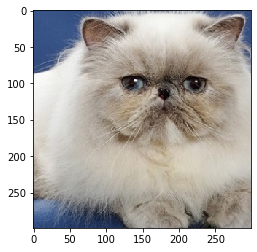

In [0]:
# 8. - code snippets from Chapter 13.,"Hands On ML" were used

# each of the image will be resized prior to classificaton
width = 299
height = 299
channels = 3

img1 = mpimg.imread(os.path.join('/content/drive/My Drive/data_cnn', 'images', '1_persian_cat.jpg'))[:, :, :channels]
img2 = mpimg.imread(os.path.join('/content/drive/My Drive/data_cnn', 'images', '2_wolf.png'))[:, :, :channels]
img3 = mpimg.imread(os.path.join('/content/drive/My Drive/data_cnn', 'images', '3_tiger.jpg'))[:, :, :channels]
img4 = mpimg.imread(os.path.join('/content/drive/My Drive/data_cnn', 'images', '4_bear.png'))[:, :, :channels]
img5 = mpimg.imread(os.path.join('/content/drive/My Drive/data_cnn', 'images', '5_panda.jpg'))[:, :, :channels]
plt.imshow(img1)
plt.show()


In [0]:
INCEPTION_V3_CHECKPOINT_PATH = os.path.join('/content/drive/My Drive/data_cnn', 'inception', 'inception_v3.ckpt')

In [0]:
X1_test = img1.reshape(-1, height, width, channels)
X2_test = img2.reshape(-1, height, width, channels)
X3_test = img3.reshape(-1, height, width, channels)
X4_test = img4.reshape(-1, height, width, channels)
X5_test = img5.reshape(-1, height, width, channels)


CLASSES = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    path = os.path.join('/content/drive/My Drive/data_cnn', 'inception', 'imagenet_class_names.txt')
    with open(path, encoding="utf-8") as f:
        content = f.read()
        return CLASSES.findall(content)

class_names = ["background"] + load_class_names()

In [0]:
# run just once !
X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val1 = predictions.eval(feed_dict={X: X1_test})
    predictions_val2 = predictions.eval(feed_dict={X: X2_test})
    predictions_val3 = predictions.eval(feed_dict={X: X3_test})
    predictions_val4 = predictions.eval(feed_dict={X: X4_test})
    predictions_val5 = predictions.eval(feed_dict={X: X5_test})
    

most_likely_class_index = np.argmax(predictions_val1[0])
top_5 = np.argpartition(predictions_val1[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val1[0][top_5])])
print('Image 1 - Persian Cat')
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val1[0][i]))
print()    

most_likely_class_index = np.argmax(predictions_val2[0])
top_5 = np.argpartition(predictions_val2[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val2[0][top_5])])
print('Image 2 - Wolf')
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val2[0][i]))

print() 
most_likely_class_index = np.argmax(predictions_val3[0])
top_5 = np.argpartition(predictions_val3[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val3[0][top_5])])
print('Image 3 - Tiger')
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val3[0][i]))

print() 
most_likely_class_index = np.argmax(predictions_val4[0])
top_5 = np.argpartition(predictions_val4[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val4[0][top_5])])
print('Image 4 - Brown Bear')
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val4[0][i]))

print() 
most_likely_class_index = np.argmax(predictions_val5[0])
top_5 = np.argpartition(predictions_val5[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val5[0][top_5])])
print('Image 5 - Panda')
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val5[0][i]))
    

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/data_cnn/inception/inception_v3.ckpt
Image 1 - Persian Cat
web site, website, internet site, site: 100.00%
flatworm, platyhelminth: 0.00%
pitcher, ewer: 0.00%
binoculars, field glasses, opera glasses: 0.00%
kimono: 0.00%

Image 2 - Wolf
timber wolf, grey wolf, gray wolf, Canis lupus: 93.53%
red wolf, maned wolf, Canis rufus, Canis niger: 2.08%
white wolf, Arctic wolf, Canis lupus tundrarum: 1.02%
coyote, prairie wolf, brush wolf, Canis latrans: 0.35%
dingo, warrigal, warragal, Canis dingo: 0.22%

Image 3 - Tiger
flatworm, platyhelminth: 100.00%
web site, website, internet site, site: 0.00%
pitcher, ewer: 0.00%
clog, geta, patten, sabot: 0.00%
ox: 0.00%

Image 4 - Brown Bear
brown bear, bruin, Ursus arctos: 95.92%
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus: 0.19%
American black bear, black bear, Ursus americanus, Euarctos americanus: 0.18%
sloth bear, Melursus ursinus, Ursus ursinus: 0.17%
wombat: 0.04%



In [0]:
# 9 Transfer Learning



CLASSES_PATH = "/content/drive/My Drive/data30/train"
# list of product categories
product_classes = sorted([dirname for dirname in os.listdir(CLASSES_PATH)
                  if os.path.isdir(os.path.join(CLASSES_PATH, dirname))])
product_classes
from collections import defaultdict

image_paths = defaultdict(list)

for product_class in product_classes:
    image_dir = os.path.join(CLASSES_PATH, product_class)
    for filepath in os.listdir(image_dir):
        image_paths[product_class].append(os.path.join(image_dir, filepath))

Class: Asparagus, string beans & brussels sprouts


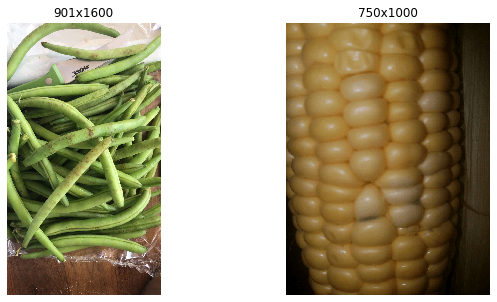

Class: Bananas, apples & pears


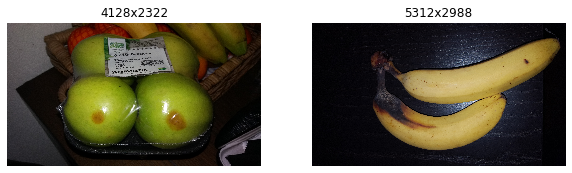

Class: Bell peppers, zucchinis & eggplants


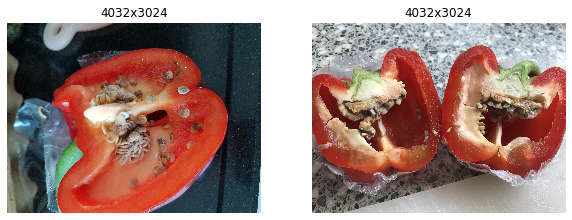

Class: Berries & cherries


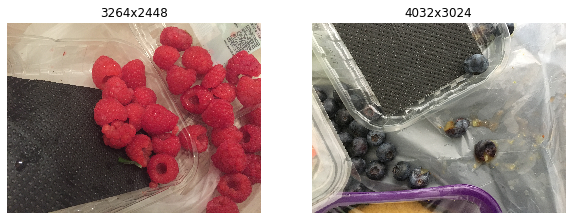

Class: Broccoli, cauliflowers, carrots & radish


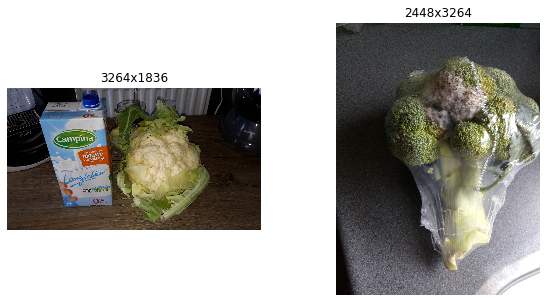

Class: Cheese


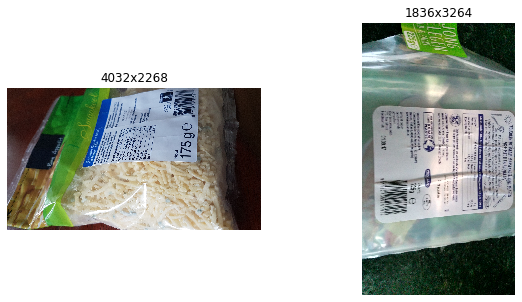

Class: Citrus fruits


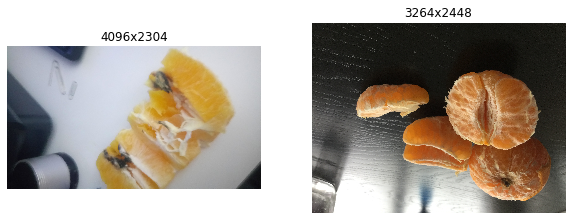

Class: Cucumber, tomatoes & avocados


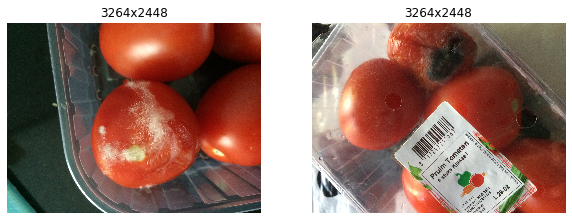

Class: Eggs


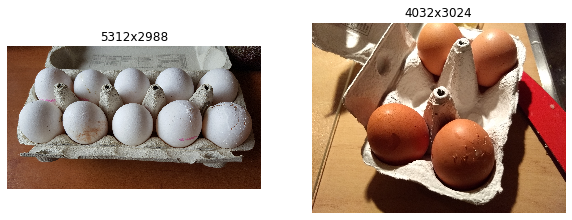

Class: Fish


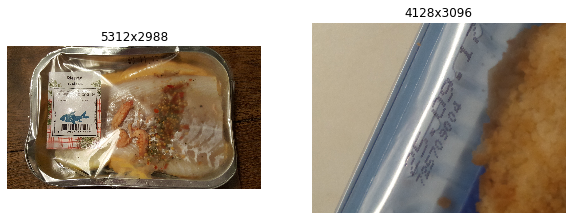

Class: Fresh bread


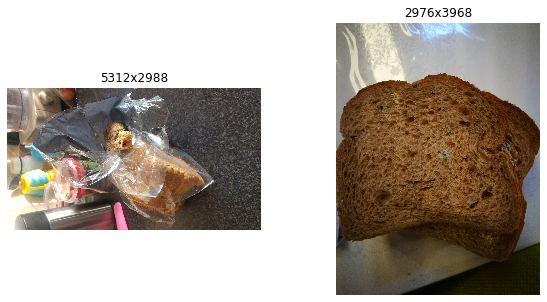

Class: Fresh herbs


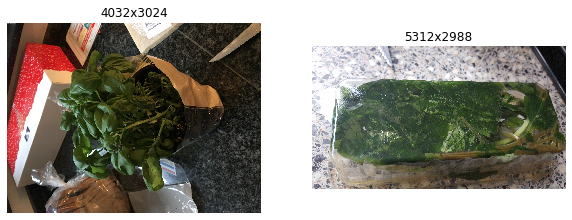

Class: Kiwis, grapes & mango


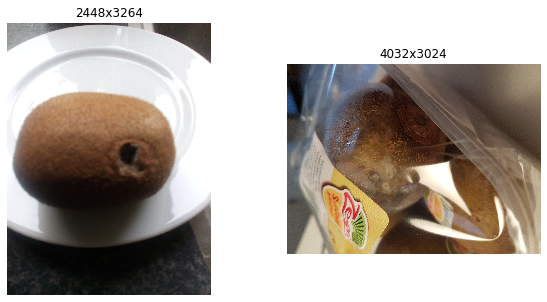

Class: Lunch & Deli Meats


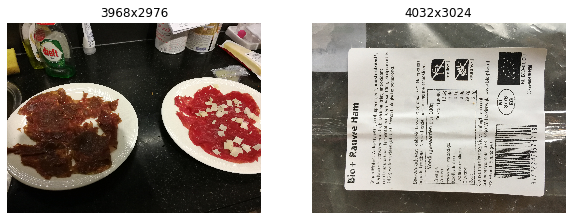

Class: Milk


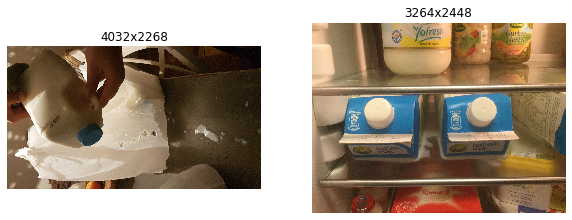

Class: Minced meat & meatballs


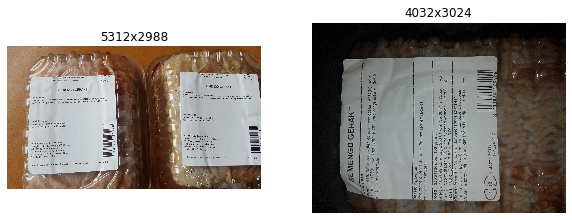

Class: Nectarines, peaches & apricots


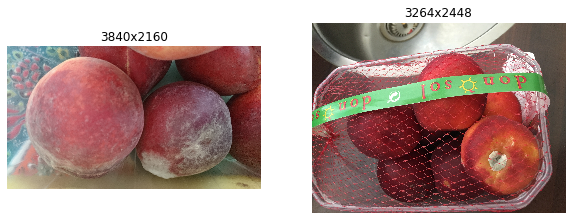

Class: Onions, leek, garlic & beets


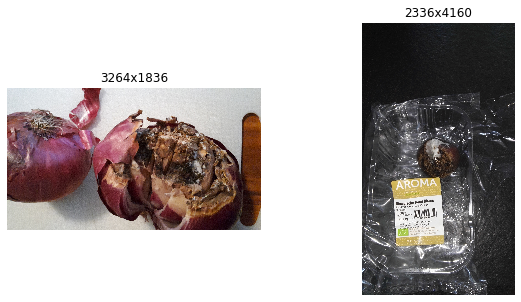

Class: Pineapples, melons & passion fruit


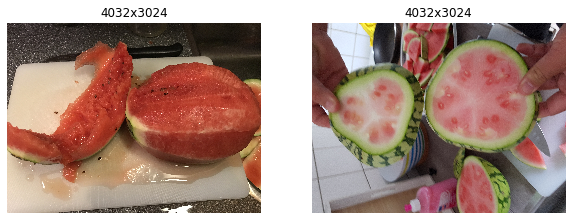

Class: Pork, beef & lamb


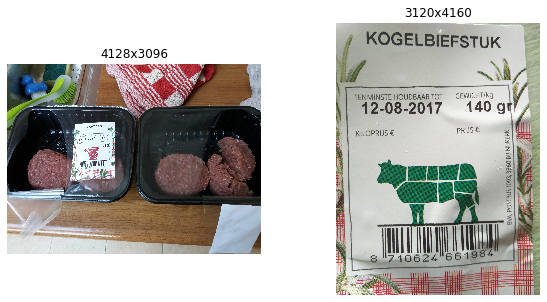

Class: Potatoes


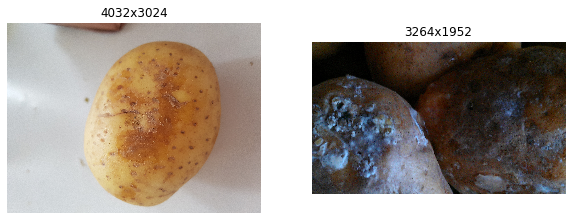

Class: Poultry


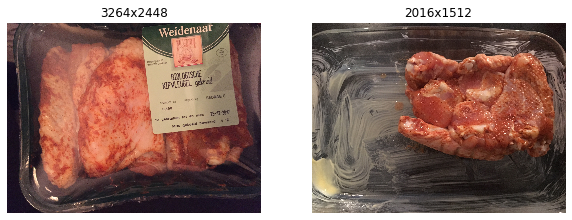

Class: Pre-baked breads


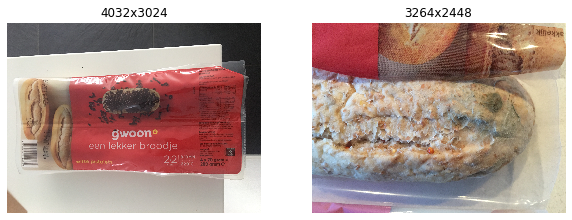

Class: Pudding, yogurt & quark


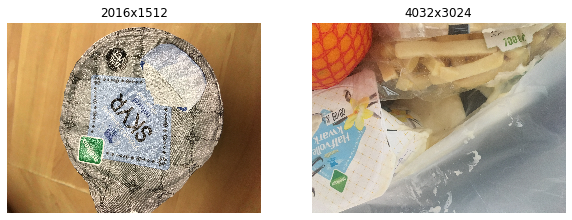

Class: Salad & cress


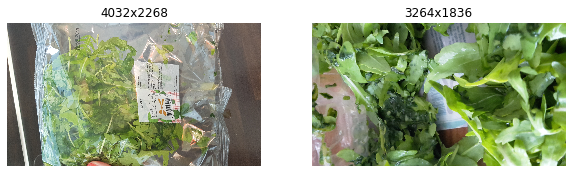

In [8]:
# plot 2 images for each of the 25 classes

width = 299
height = 299
channels = 3


n_examples_per_class = 2

for product_class in product_classes:
    print("Class:", product_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[product_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()

In [0]:
from skimage.transform import resize

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    """the function zooms and crops the image randomly for data augmentation."""

    # find the largest bounding box with the target size ratio that fits within the image
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    # crop the image 
    image = image[y0:y1, x0:x1]

    # flip  with 50% probability
    if np.random.rand() < 0.5:
        image = np.fliplr(image)

    # resize 
    image = resize(image, (target_width, target_height))
    
    # colors are represented as 32-bit floats
    return image.astype(np.float32)

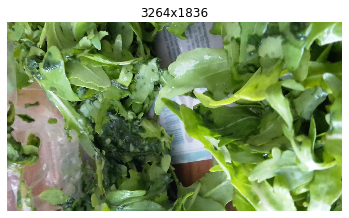

In [8]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

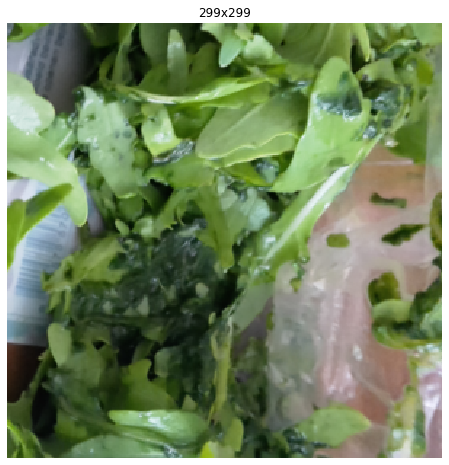

In [9]:
prepared_image = prepare_image(example_image)

plt.figure(figsize=(8, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

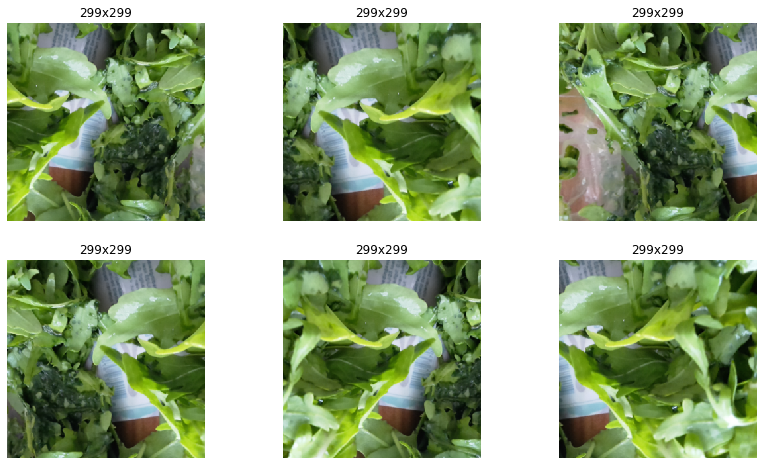

In [10]:
rows, cols = 2, 3

plt.figure(figsize=(14, 8))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

In [0]:
# this time use a training placeholder 

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training) # add reuse=True as argument if run again

inception_saver = tf.train.Saver()

In [14]:
# we proceed from Dropout Layer
end_points

{'AuxLogits': <tf.Tensor 'InceptionV3_2/AuxLogits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3_2/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3_2/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3_2/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3_2/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3_2/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionV3_2/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3_2/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3_2/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 3

In [11]:
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2]) # drop second and third dimension
n_outputs = len(product_classes)

with tf.name_scope("added_output_layer"):
    product_logits = tf.layers.dense(prelogits, n_outputs, name="product_logits")
    Y_proba = tf.nn.softmax(product_logits, name="Y_proba")
# freeze all layers up to the bottleneck layer

y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=product_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    product_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="product_logits")
    training_op = optimizer.minimize(loss, var_list=product_vars)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(product_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
# turn classes to ids
product_class_ids = {product_class: index for index, product_class in enumerate(product_classes)}
product_class_ids

Instructions for updating:
Use keras.layers.Dense instead.


{'Asparagus, string beans & brussels sprouts': 0,
 'Bananas, apples & pears': 1,
 'Bell peppers, zucchinis & eggplants': 2,
 'Berries & cherries': 3,
 'Broccoli, cauliflowers, carrots & radish': 4,
 'Cheese': 5,
 'Citrus fruits': 6,
 'Cucumber, tomatoes & avocados': 7,
 'Eggs': 8,
 'Fish': 9,
 'Fresh bread': 10,
 'Fresh herbs': 11,
 'Kiwis, grapes & mango': 12,
 'Lunch & Deli Meats': 13,
 'Milk': 14,
 'Minced meat & meatballs': 15,
 'Nectarines, peaches & apricots': 16,
 'Onions, leek, garlic & beets': 17,
 'Pineapples, melons & passion fruit': 18,
 'Pork, beef & lamb': 19,
 'Potatoes': 20,
 'Poultry': 21,
 'Pre-baked breads': 22,
 'Pudding, yogurt & quark': 23,
 'Salad & cress': 24}

In [0]:
product_paths_and_classes = []
for product_class, paths in image_paths.items():
    for path in paths:
        product_paths_and_classes.append((path, product_class_ids[product_class]))


# divide into test and train dataset
test_ratio = 0.2
train_size = int(len(product_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(product_paths_and_classes)

product_paths_and_classes_train = product_paths_and_classes[:train_size]
product_paths_and_classes_test = product_paths_and_classes[train_size:]

In [0]:
def prepare_batch(product_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(product_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception requires colors ranging from -1 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, y_batch

In [0]:
X_batch, y_batch = prepare_batch(product_paths_and_classes_train, batch_size=4)

In [21]:
len(product_paths_and_classes_train)

5206

In [0]:
X_test_p, y_test_p = prepare_batch(product_paths_and_classes_test, batch_size=1302)

In [0]:
# train the output layer. It takes long time !!!

In [22]:
n_epochs = 2
batch_size = 30
n_iterations_per_epoch = len(product_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(product_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Last batch accuracy:", acc_batch)

        save_path = saver.save(sess, "./product_model")

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/data_cnn/inception/inception_v3.ckpt
Epoch 0.............................................................................................................................................................................  Last batch accuracy: 0.5
Epoch 1.............................................................................................................................................................................  Last batch accuracy: 0.46666667
